Hodnota optimalizovaná funkce byla v jednotlivých krovích následující:
Čas: w0: w1: f(w0, w1)
0: 7.0: -9.0: 48.4351
1: 3.0842: -6.9: 16.6572
2: -2.9168: -5.22: 13.1367
3: 2.7901: -3.876: 10.8026
4: -2.6886: -2.8008: 9.2157
5: 2.6043: -1.9406: 8.1102
6: -2.5325: -1.2525: 7.3196
7: 2.47: -0.702: 6.7379
8: -2.4148: -0.2616: 6.2968
9: 2.3655: 0.0907: 5.9519
10: -2.3211: 0.3726: 5.674
11: 2.2807: 0.5981: 5.4437
12: -2.2437: 0.7784: 5.2483
13: 2.2095: 0.9228: 5.0787
14: -2.1779: 1.0382: 4.9291
15: 2.1485: 1.1306: 4.795
16: -2.1211: 1.2045: 4.6736
17: 2.0953: 1.2636: 4.5624
18: -2.0711: 1.3108: 4.46
19: 2.0482: 1.3487: 4.3651
20: -2.0266: 1.3789: 4.2766


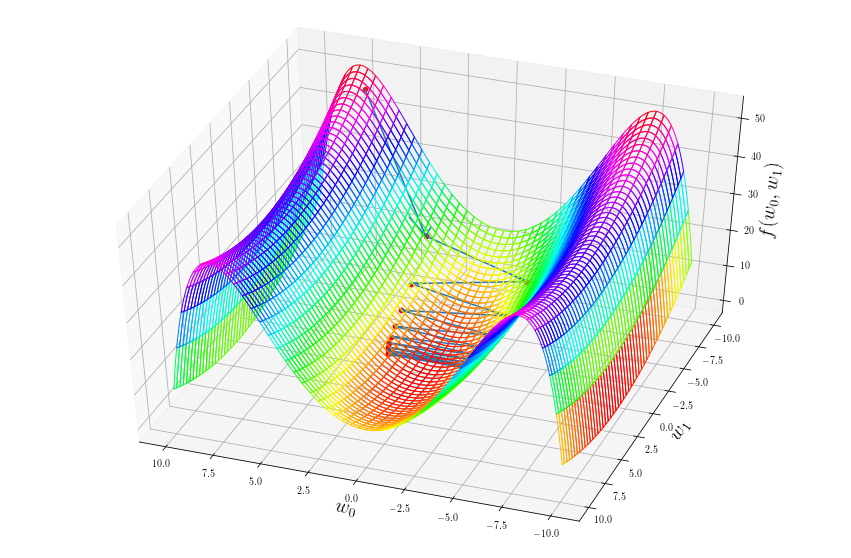

In [337]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import matplotlib.pyplot as plt
import random
from matplotlib import rc
rc('text', usetex=True)

def f(x, y):
    return (-x**6 + 10**4*x**2 + 1000*(y-2)**2 + 1000*y)/10000

def df(x, y):
    return np.array([-6*x**5 + 10**4*2*x, 1000*2*(y-2) + 1000])/10000

alpha = 1
beta1 = 0.9
beta2 = 0.999
epsilon = 10**(-8)
u = np.zeros(2)
v = np.zeros(2)
t = 1
start_pt = [7, -9]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-10.0, 10.0, 0.05, dtype=np.float32)
y = np.arange(-10.0, 10.0, 0.05, dtype=np.float32)

X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.set_xlabel(r'$w_0$', fontsize=20)
ax.set_ylabel(r'$w_1$', fontsize=20)
ax.set_zlabel(r'$f(w_0, w_1)$', fontsize=20)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.set_zticklabels([])

ax.view_init(45, 110)
#ax.view_init(90, 0)
#ax.view_init(0, 90)
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.hsv(norm(Z))

surf = ax.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
pt_xy_new = np.array(start_pt)
iteraction_cnt = 20
points = np.zeros((iteraction_cnt+1, 3))
points[0, 0:2] = start_pt
#optimizer="adam"
optimizer="sgd"
for i in range(iteraction_cnt):
    pt_xy = points[i][0:2]
    pt_z = f(*pt_xy)
    points[i][2] = pt_z
    if(optimizer == "sgd"):
        pt_dxy = df(*pt_xy)*(-alpha)
    elif(optimizer == "adam"):
        g = df(*pt_xy)
        u = beta1 * u + (1-beta1) * g
        v = beta2 * v + (1-beta2) * np.power(g, 2)
        u_hat = u / (1-beta1**t)
        v_hat = v / (1-beta2**t)
        pt_dxy = -alpha * u_hat/(np.sqrt(v_hat) + epsilon)
        t += 1
    pt_xy_new = pt_xy + pt_dxy
    pt_z_new = f(*pt_xy_new)
    points[i+1] = [*pt_xy_new, pt_z_new]
    ax.scatter(xs=pt_xy[0], ys=pt_xy[1], zs=pt_z, c='red', s=20)
    ax.quiver(pt_xy[0], pt_xy[1], pt_z, 
              pt_dxy[0], pt_dxy[1], pt_z_new-pt_z, arrow_length_ratio=0.1)
    ax.scatter(xs=pt_xy_new[0], ys=pt_xy_new[1], zs=pt_z_new, c='red', s=20)
    #print(f"x = {pt_xy[0]}; y = {pt_xy[1]}; z = {pt_z}; dx = {pt_dxy[0]}; dy = {pt_dxy[1]}; x_new = {pt_xy_new[0]}; y_new = {pt_xy_new[1]}; z_new = {pt_z_new}; z_new-z = {pt_z_new-pt_z}")

print("Hodnota optimalizovaná funkce byla v jednotlivých krovích následující:")
print("Čas: w0: w1: f(w0, w1)")
print("\n".join([f"{index}: {round(x, 4)}: {round(y, 4)}: {round(z, 4)}" for index, (x, y, z) in enumerate(points)]))
    
plt.savefig(f'optimalizace_pomoci_{optimizer}.pdf', bbox_inches='tight')
